## 원, 삼각형, 사각형 구분하기

In [2]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

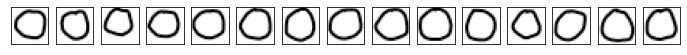

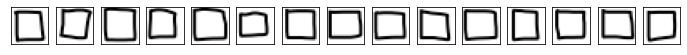

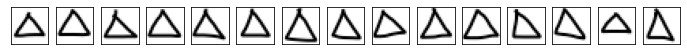

In [3]:
# Train dataset
shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'./data/handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

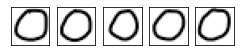

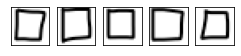

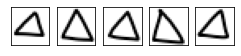

In [4]:
# Test dataset
for shape in shapes:
    dir_name = f'./data/handwriting_shape/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

In [5]:
import cv2
cv2.imread('./data/handwriting_shape/train/circle/circle001.png')[:,:,::-1].shape

(24, 24, 3)

#### Data Generation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    './data/handwriting_shape/train', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    './data/handwriting_shape/test', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [8]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [9]:
train_data_generator.filenames[0]

'circle\\circle001.png'

#### Modeling

In [11]:
import numpy as np
import tensorflow as tf

seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [14]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [15]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=50,
    validation_data=test_data_generator, validation_steps=5
)

Epoch 1/50
15/15 [==============================] - 9s 16ms/step - loss: 0.8856 - accuracy: 0.7111 - val_loss: 0.4434 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9556 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 8.7584e-04 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 7.1777e-04 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 3.0375e-04 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 2.2894e-04 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 1.0000
Epo

In [16]:
model.evaluate(test_data_generator, steps=5)

5/5 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000


[0.009849131107330322, 1.0]

## 원, 삼각형, 사각형 구분하기
- 어려운 문제를 기존 CNN 문제로 푸는 경우

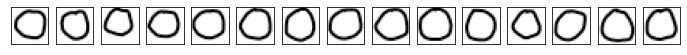

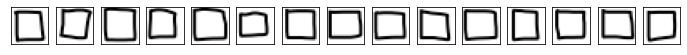

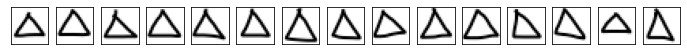

In [18]:
# Train dataset
shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'./data/hard_handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

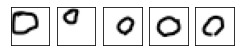

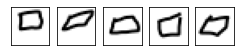

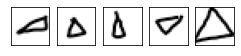

In [19]:
# Test dataset
for shape in shapes:
    dir_name = f'./data/hard_handwriting_shape/test/{shape}'
    plt.figure(figsize=(4,1))
    for i, fname in enumerate(glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img)
        plt.xticks([]), plt.yticks([])
    plt.show()

#### Data Generation

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    './data/hard_handwriting_shape/train', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    './data/hard_handwriting_shape/test', target_size=(24,24), batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


#### Modeling

In [24]:
import numpy as np
import tensorflow as tf

seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [28]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               819328    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                      

In [29]:

model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [30]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=50,
    validation_data=test_data_generator, validation_steps=5
)

Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 1.1509 - accuracy: 0.5778 - val_loss: 1.1976 - val_accuracy: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.2466 - accuracy: 0.9556 - val_loss: 2.0279 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 2.9007 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.3209 - val_accuracy: 0.4000
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 4.8302e-04 - accuracy: 1.0000 - val_loss: 3.5283 - val_accuracy: 0.4000
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 3.1798e-04 - accuracy: 1.0000 - val_loss: 3.7042 - val_accuracy: 0.4000
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 2.0280e-04 - accuracy: 1.0000 - val_loss: 3.9338 - val_accuracy: 0.4000
Epoch 8

In [31]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 2ms/step - loss: 6.2943 - accuracy: 0.4000


[6.294343948364258, 0.4000000059604645]

## 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제에 Data Argument를 이용해 데이터를 생성
- 기존 CNN 모델 생성

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,          # randomly rotate images in the range 15 degree
    width_shift_range=0.1,      # randomly shift images horizontally 
    height_shift_range=0.1,     # randomly shift images vertically
    shear_range=0.5,            # 도형의 기울기
    zoom_range=[0.8,1.5],       # 0.8~1.5 배 크기로 임의로 확대/축소
    horizontal_flip=True,       # randomly flip images
    vertical_flip=False,        # randomly flip images
    fill_mode='nearest'         # set mode for filling points outside the input boundaries
)

In [33]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('./data/hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x.shape

(24, 24, 3)

In [34]:
#x.reshape(1, 24, 24, 3)
x = x.reshape((1,) + x.shape)
x.shape

(1, 24, 24, 3)

#### Data Argument를 통해 만들어지는 새로운 도형 이미지

In [35]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [36]:
import os
if not os.path.exists('./data/preview'):
    os.mkdir('./data/preview')

In [37]:
count = 0
for _ in train_datagen.flow(x, batch_size=1, save_to_dir='./data/preview', save_prefix='pre'):
    count += 1
    if count >= 30:
        break

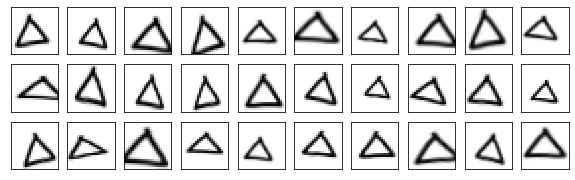

In [38]:
plt.figure(figsize=(10,3))
for i, fname in enumerate(glob('./data/preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
train_data_generator = train_datagen.flow_from_directory(
    './data/hard_handwriting_shape/train', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [40]:
# Test set 에 대해서는 Data Argument를 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    './data/hard_handwriting_shape/test', target_size=(24,24),
    batch_size=3, class_mode='categorical'
)

Found 15 images belonging to 3 classes.


#### Modeling

In [42]:
import numpy as np
import tensorflow as tf

seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [44]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               819328    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [45]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [46]:
model.fit(
    train_data_generator, steps_per_epoch=15, epochs=300,
    validation_data=test_data_generator, validation_steps=5
)

Epoch 1/300
15/15 [==============================] - 1s 16ms/step - loss: 1.1868 - accuracy: 0.3778 - val_loss: 1.0728 - val_accuracy: 0.5333
Epoch 2/300
15/15 [==============================] - 0s 7ms/step - loss: 0.7993 - accuracy: 0.6222 - val_loss: 1.2870 - val_accuracy: 0.3333
Epoch 3/300
15/15 [==============================] - 0s 7ms/step - loss: 0.5556 - accuracy: 0.7111 - val_loss: 1.3071 - val_accuracy: 0.4667
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6242 - accuracy: 0.6889 - val_loss: 1.3330 - val_accuracy: 0.4000
Epoch 5/300
15/15 [==============================] - 0s 7ms/step - loss: 0.3923 - accuracy: 0.8889 - val_loss: 2.0908 - val_accuracy: 0.3333
Epoch 6/300
15/15 [==============================] - 0s 6ms/step - loss: 0.4209 - accuracy: 0.8667 - val_loss: 2.3511 - val_accuracy: 0.4667
Epoch 7/300
15/15 [==============================] - 0s 7ms/step - loss: 0.2986 - accuracy: 0.9111 - val_loss: 1.4273 - val_accuracy: 0.5333
Epoch 8/300


In [47]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 3ms/step - loss: 3.3577 - accuracy: 0.6667


[3.357743978500366, 0.6666666865348816]